In [3]:
# Importando os pacotes para análise

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro, kstest
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import normaltest
from statsmodels.tsa.stattools import adfuller, kpss

In [36]:
# Carregando os dados do Excel
dados_excel = pd.read_excel('C:/Users/mclar/Downloads/DadosCompeticao.xlsx', index_col=0)  
# Assumindo que a primeira coluna é indica tempo)

In [45]:
# Separarando as séries temporais trimestrais e mensais
dados_trimestrais = dados_excel.iloc[:, :2]  # Assumindo que as séries trimestrais estão nas duas primeiras colunas
dados_mensais = dados_excel.iloc[:, 2:]  # Assumindo que as séries mensais estão a partir da terceira coluna

# Exibindo as primeiras linhas das séries trimestrais e mensais para verificação
print("Séries Trimestrais:")
print(dados_trimestrais.head())

print("\nSéries Mensais:")
print(dados_mensais.head())

        A     B
T              
1  1036.5  15.4
2  1043.2  15.8
3  1047.1  16.2
4  1060.0  16.6
5  1066.8  17.1
         C        D         E         F         G       H
T                                                        
1   3631.8  98021.0  299479.0  255211.0  239103.0  458000
2   7478.7  82426.0   86725.0  248515.0  271032.0  399000
3  10591.0  51646.0   94049.0  246810.0  307214.0  451000
4   7381.1  87228.0  114663.0  299437.0  256665.0  453000
5  14999.7  65418.0  122945.0  311612.0  231063.0  447000
Séries Trimestrais:
        A     B
T              
1  1036.5  15.4
2  1043.2  15.8
3  1047.1  16.2
4  1060.0  16.6
5  1066.8  17.1

Séries Mensais:
         C        D         E         F         G       H
T                                                        
1   3631.8  98021.0  299479.0  255211.0  239103.0  458000
2   7478.7  82426.0   86725.0  248515.0  271032.0  399000
3  10591.0  51646.0   94049.0  246810.0  307214.0  451000
4   7381.1  87228.0  114663.0  299437.0  25

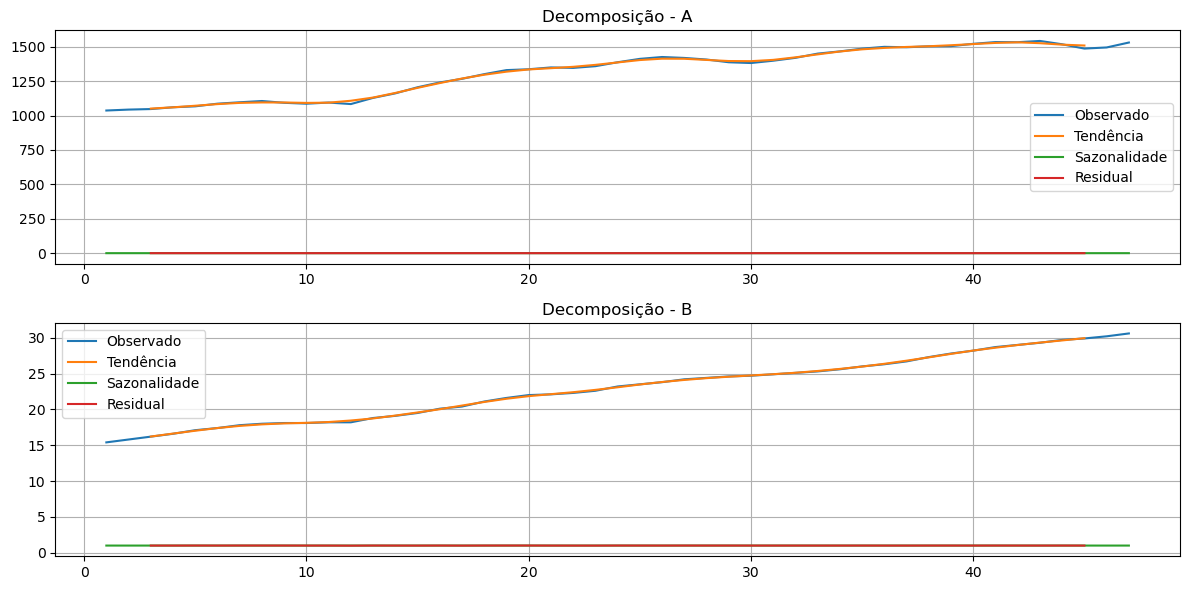

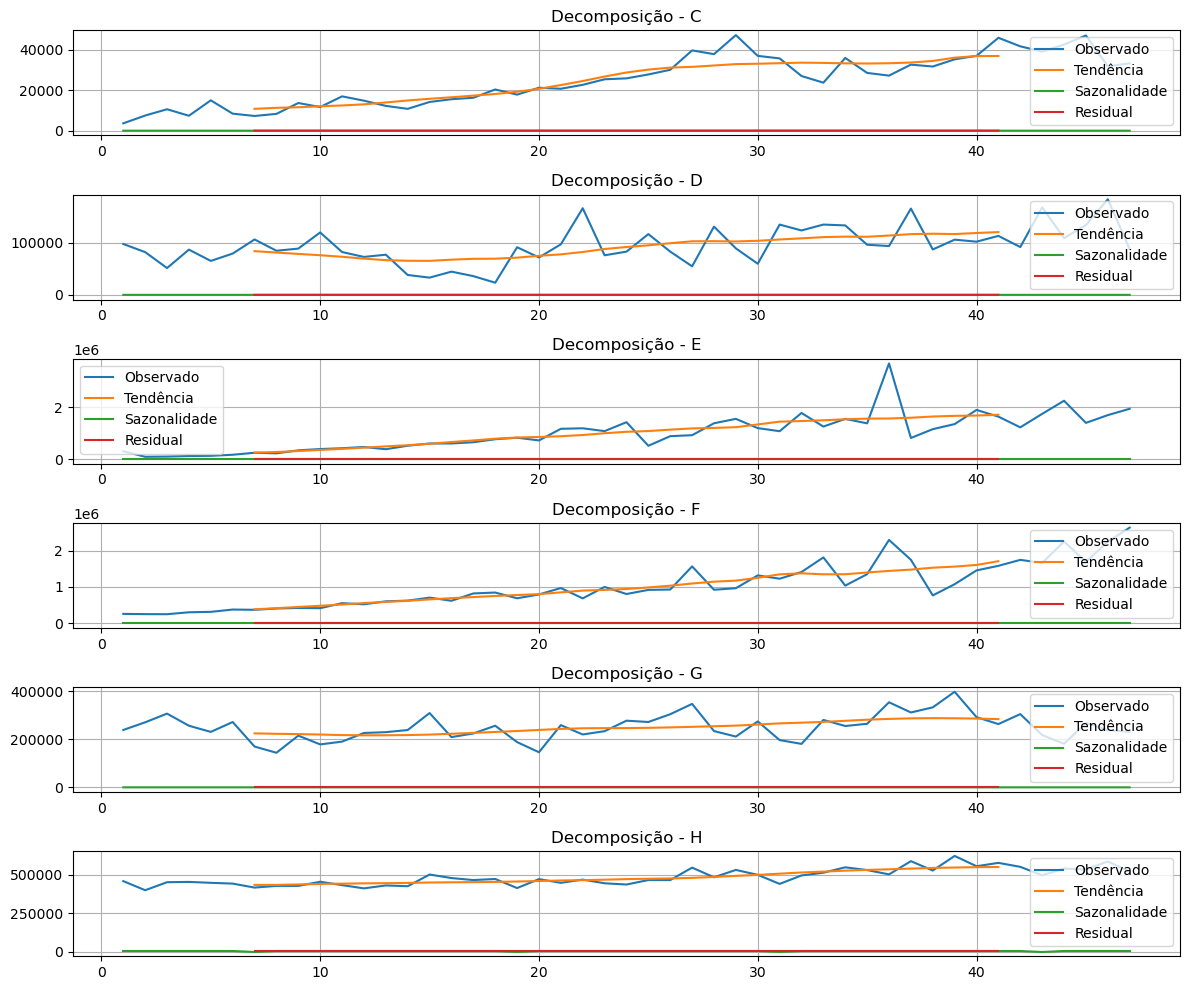

In [9]:
# Tratando a sazonalidade
# Realizando a decomposição para as séries trimestrais
decomposicao_trimestrais = {}
for coluna in dados_trimestrais.columns:
    decomposicao_trimestrais[coluna] = seasonal_decompose(dados_trimestrais[coluna], model='multiplicative', period=4)

# Visualizando os componentes da decomposição das séries trimestrais
plt.figure(figsize=(12, 6))
for i, coluna in enumerate(decomposicao_trimestrais, start=1):
    plt.subplot(len(dados_trimestrais.columns), 1, i)
    plt.plot(decomposicao_trimestrais[coluna].observed)
    plt.plot(decomposicao_trimestrais[coluna].trend)
    plt.plot(decomposicao_trimestrais[coluna].seasonal)
    plt.plot(decomposicao_trimestrais[coluna].resid)
    plt.title(f'Decomposição - {coluna}')
    plt.legend(['Observado', 'Tendência', 'Sazonalidade', 'Residual'])
    plt.grid(True)
plt.tight_layout()
plt.show()

# Realizando a decomposição para as séries mensais
decomposicao_mensais = {}
for coluna in dados_mensais.columns:
    decomposicao_mensais[coluna] = seasonal_decompose(dados_mensais[coluna], model='multiplicative', period=12)

# Visualizando os componentes da decomposição das séries mensais
plt.figure(figsize=(12, 10))
for i, coluna in enumerate(decomposicao_mensais, start=1):
    plt.subplot(len(dados_mensais.columns), 1, i)
    plt.plot(decomposicao_mensais[coluna].observed)
    plt.plot(decomposicao_mensais[coluna].trend)
    plt.plot(decomposicao_mensais[coluna].seasonal)
    plt.plot(decomposicao_mensais[coluna].resid)
    plt.title(f'Decomposição - {coluna}')
    plt.legend(['Observado', 'Tendência', 'Sazonalidade', 'Residual'])
    plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Testando estacionariedade

def testar_estacionariedade(serie):
    resultado_teste = adfuller(serie)
    print('Resultado do Teste de Dickey-Fuller Aumentado:')
    print(f'Estatística do teste: {resultado_teste[0]}')
    print(f'Valor-p: {resultado_teste[1]}')
    print(f'Valores críticos:')
    for chave, valor in resultado_teste[4].items():
        print(f'   {chave}: {valor}')

# Testando estacionariedade das séries trimestrais
print('Teste de Estacionariedade das Séries Trimestrais:')
for coluna in dados_trimestrais.columns:
    print(f'Coluna {coluna}:')
    testar_estacionariedade(dados_trimestrais[coluna])

# Testando estacionariedade das séries mensais
print('Teste de Estacionariedade das Séries Mensais:')
for coluna in dados_mensais.columns:
    print(f'Coluna {coluna}:')
    testar_estacionariedade(dados_mensais[coluna])

Teste de Estacionariedade das Séries Trimestrais:
Coluna A:
Resultado do Teste de Dickey-Fuller Aumentado:
Estatística do teste: -1.0513227989953686
Valor-p: 0.7340886009348105
Valores críticos:
   1%: -3.584828853223594
   5%: -2.9282991495198907
   10%: -2.6023438271604937
Coluna B:
Resultado do Teste de Dickey-Fuller Aumentado:
Estatística do teste: 0.2468292707254938
Valor-p: 0.9747691340373335
Valores críticos:
   1%: -3.584828853223594
   5%: -2.9282991495198907
   10%: -2.6023438271604937
Teste de Estacionariedade das Séries Mensais:
Coluna C:
Resultado do Teste de Dickey-Fuller Aumentado:
Estatística do teste: -1.924925057319525
Valor-p: 0.3204279396413455
Valores críticos:
   1%: -3.5812576580093696
   5%: -2.9267849124681518
   10%: -2.6015409829867675
Coluna D:
Resultado do Teste de Dickey-Fuller Aumentado:
Estatística do teste: -0.5007683528996197
Valor-p: 0.8918664704183505
Valores críticos:
   1%: -3.6155091011809297
   5%: -2.941262357486514
   10%: -2.6091995013850418
C

In [10]:
# Testes de normalidade 
# Teste de Jarque-Bera para todas as colunas do DataFrame
resultados_JB = {}
for coluna in dados_excel.columns:
    stat_JB, pvalor_JB, skewness_JB, kurtosis_JB = jarque_bera(dados_excel[coluna])
    resultados_JB[coluna] = {'Estatística JB': stat_JB, 'p-valor JB': pvalor_JB, 'Skewness JB': skewness_JB, 'Kurtosis JB': kurtosis_JB}

# Teste de Omnibus (normaltest) para todas as colunas do DataFrame
resultados_omnibus = {}
for coluna in dados_excel.columns:
    stat_omnibus, pvalor_omnibus = normaltest(dados_excel[coluna])
    resultados_omnibus[coluna] = {'Estatística Omnibus': stat_omnibus, 'p-valor Omnibus': pvalor_omnibus}

# Exibind os resultados dos testes de normalidade
print("Resultados do Teste de Jarque-Bera:")
for coluna, resultado in resultados_JB.items():
    print(f'Coluna {coluna}: Estatística JB = {resultado["Estatística JB"]}, p-valor JB = {resultado["p-valor JB"]}, Skewness JB = {resultado["Skewness JB"]}, Kurtosis JB = {resultado["Kurtosis JB"]}')

print("\nResultados do Teste de Omnibus:")
for coluna, resultado in resultados_omnibus.items():
    print(f'Coluna {coluna}: Estatística Omnibus = {resultado["Estatística Omnibus"]}, p-valor Omnibus = {resultado["p-valor Omnibus"]}')

Resultados do Teste de Jarque-Bera:
Coluna A: Estatística JB = 4.909355475170327, p-valor JB = 0.08589087038093224, Skewness JB = -0.40085879177013767, Kurtosis JB = 1.6346598080575039
Coluna B: Estatística JB = 2.721374761259233, p-valor JB = 0.2564844139283037, Skewness JB = 0.04868815390142219, Kurtosis JB = 1.8251995783790136
Coluna C: Estatística JB = 2.635956805570936, p-valor JB = 0.2676758881878999, Skewness JB = 0.11396937570518048, Kurtosis JB = 1.8624304759412547
Coluna D: Estatística JB = 1.0680717155184514, p-valor JB = 0.5862342309444282, Skewness JB = 0.3691218907537289, Kurtosis JB = 3.0198605610067166
Coluna E: Estatística JB = 25.26764766871307, p-valor JB = 3.2598680646967834e-06, Skewness JB = 1.186766088837564, Kurtosis JB = 5.696103410170021
Coluna F: Estatística JB = 4.880983985960871, p-valor JB = 0.08711797948211461, Skewness JB = 0.7847514574181099, Kurtosis JB = 2.8294774066177135
Coluna G: Estatística JB = 1.0547484301194474, p-valor JB = 0.590152550661747, 

In [79]:
#Importando os pacotes para análise das séries através do modelo LSTM

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [80]:
#Prevendo os valores de A
# Valores da série A fornecidos
serie_A = np.array([
    1036.5, 1043.2, 1047.1, 1060.0, 1066.8, 1086.1, 1096.3, 1105.5, 1092.4, 1085.9,
    1094.3, 1083.3, 1128.2, 1161.0, 1205.3, 1240.2, 1266.6, 1300.4, 1329.8, 1336.0,
    1349.2, 1345.9, 1358.2, 1386.8, 1411.4, 1424.9, 1418.2, 1406.6, 1386.8, 1381.2,
    1398.0, 1418.8, 1449.6, 1465.7, 1485.5, 1498.7, 1495.7, 1502.6, 1503.7, 1520.6,
    1533.3, 1532.4, 1541.5, 1517.3, 1486.1, 1494.2, 1530.0, 1566.7, 1586.4, 1617.0,
    1609.5, 1623.4, 1651.6, 1646.8, 1648.4, 1634.1, 1651.3, 1672.1, 1696.3, 1734.9,
    1757.9, 1776.4, 1793.1, 1790.1, 1814.6, 1840.0, 1872.5, 1886.1, 1928.7, 1945.4,
    1965.2, 1973.7, 2016.9, 2046.4, 2079.3, 2127.6, 2170.1, 2175.8, 2198.3, 2209.2,
    2221.8, 2235.2, 2267.7, 2280.6, 2307.3, 2346.9, 2365.3, 2363.0, 2396.5, 2399.8,
    2413.2, 2403.5, 2388.6, 2386.5, 2415.8, 2393.8, 2458.6, 2458.4, 2471.1, 2471.0,
    2525.6, 2575.1, 2602.1, 2651.3, 2714.0, 2721.0, 2718.3, 2742.8, 2727.4, 2735.2,
    2699.3, 2675.4, 2622.7, 2649.6, 2694.9, 2732.7, 2784.4, 2796.9, 2808.6, 2836.8,
    2876.0, 2922.7, 2981.8, 2974.1, 3000.5, 3095.9, 3122.6, 3161.6, 3161.7, 3158.7,
    3187.4, 3181.3, 3213.4, 3137.0, 3139.1, 3179.2, 3241.1, 3230.2, 3244.6, 3199.0,
    3150.4, 3159.9, 3134.5, 3139.3, 3166.6, 3238.3, 3286.4, 3345.1, 3431.7, 3478.0,
    3500.6, 3515.2, 3548.7, 3567.1, 3603.0, 3630.9, 3678.8, 3684.7, 3698.0, 3711.5,
    3752.2, 3776.4, 3775.3, 3811.2, 3923.8, 3952.8
])

# Normalizando os dados para o modelo LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
serie_A_scaled = scaler.fit_transform(serie_A.reshape(-1, 1))

# Preparaando dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 4  # Considerando que cada valor corresponde a um trimestre anterior
X_A, y_A = prepare_data(serie_A_scaled, n_steps)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_A = X_A.reshape((X_A.shape[0], X_A.shape[1], 1))

# Definindo e treinando o modelo para série A
model_A = Sequential()
model_A.add(LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model_A.add(Dense(1))
model_A.compile(optimizer='adam', loss='mean_squared_error')
model_A.fit(X_A, y_A, epochs=200, verbose=0)

# Prevendo os próximos 6 trimestres para série A
n_pred = 6
X_pred_A = serie_A_scaled[-n_steps:].reshape((1, n_steps, 1))
preds_A = []
for i in range(n_pred):
    pred_A = model_A.predict(X_pred_A)
    preds_A.append(pred_A)
    X_pred_A = np.append(X_pred_A[:, 1:, :], pred_A.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_A = scaler.inverse_transform(np.array(preds_A).reshape(-1, 1))

# Imprimindo as previsões
print("Previsões para os próximos 6 trimestres da série A:")
print(preds_A)

1/1 [==============================] - 0s 71ms/step
Previsões para os próximos 6 trimestres da série A:
[[3958.9734]
 [4010.5112]
 [4065.722 ]
 [4106.5728]
 [4151.1704]
 [4206.592 ]]


In [92]:
# Valores da série B fornecidos
serie_B = np.array([
    15.4, 15.8, 16.2, 16.6, 17.1, 17.4, 17.8, 18.0, 18.1, 18.1, 18.2, 18.2, 18.8, 19.1, 19.5,
    20.1, 20.4, 21.1, 21.6, 22.0, 22.1, 22.3, 22.6, 23.2, 23.5, 23.8, 24.2, 24.4, 24.6, 24.7,
    24.9, 25.1, 25.3, 25.6, 26.0, 26.3, 26.7, 27.3, 27.8, 28.2, 28.7, 29.0, 29.3, 29.7, 29.9,
    30.2, 30.6, 31.0, 31.3, 31.7, 31.9, 32.2, 32.9, 33.2, 33.4, 33.6, 33.9, 34.3, 34.6, 34.9,
    35.6, 35.8, 36.0, 36.5, 36.9, 37.0, 37.4, 37.9, 38.4, 38.8, 39.5, 39.7, 39.8, 40.2, 40.7,
    41.2, 41.9, 42.7, 43.3, 43.9, 44.5, 45.1, 45.7, 46.4, 47.7, 48.6, 49.3, 50.4, 51.0, 51.8,
    52.8, 53.8, 54.8, 55.6, 56.8, 57.4, 58.5, 59.5, 60.6, 61.0, 62.5, 63.5, 64.4, 65.7, 67.5,
    68.5, 69.8, 71.3, 72.9, 75.0, 77.1, 79.1, 81.3, 82.9, 84.3, 85.9, 87.9, 89.9, 91.9, 93.5,
    95.2, 97.0, 98.9, 100.9, 103.5, 105.3, 107.5, 110.0, 113.1, 115.6, 117.9, 120.9, 124.2,
    127.9, 131.0, 134.2, 137.7, 140.1, 143.2, 145.5, 149.2, 151.5, 154.3, 156.2, 157.9, 158.9,
    159.7, 161.4, 163.6, 164.8, 166.6, 168.2, 170.2, 172.1, 174.2, 176.3, 178.0, 179.3, 180.6,
    182.4, 182.9, 184.2, 184.3, 186.1, 191.4, 193.4
])

# Normalizando os dados para o modelo LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
serie_B_scaled = scaler.fit_transform(serie_B.reshape(-1, 1))

# Preparando os dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps = 4  # Considerando que cada valor corresponde a um trimestre anterior
X_B, y_B = prepare_data(serie_B_scaled, n_steps)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_B = X_B.reshape((X_B.shape[0], X_B.shape[1], 1))

# Definindo e treinando o modelo para série B
model_B = Sequential()
model_B.add(LSTM(100, activation='relu', input_shape=(n_steps, 1)))
model_B.add(Dense(1))
model_B.compile(optimizer='adam', loss='mean_squared_error')
model_B.fit(X_B, y_B, epochs=200, verbose=0)

# Prevendo os próximos 6 trimestres para série B
n_pred = 6
X_pred_B = serie_B_scaled[-n_steps:].reshape((1, n_steps, 1))
preds_B = []
for i in range(n_pred):
    pred_B = model_B.predict(X_pred_B)
    preds_B.append(pred_B)
    X_pred_B = np.append(X_pred_B[:, 1:, :], pred_B.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_B = scaler.inverse_transform(np.array(preds_B).reshape(-1, 1))

# Imprimindo as previsões
print("Previsões para os próximos 6 trimestres da série B:")
print(preds_B)

1/1 [==============================] - 0s 72ms/step
Previsões para os próximos 6 trimestres da série B:
[[192.75142]
 [194.97905]
 [197.40764]
 [198.8579 ]
 [200.09654]
 [202.0069 ]]


In [82]:
# Valores da série C fornecidos
serie_C = np.array([
    3631.8, 7478.7, 10591.0, 7381.1, 14999.7, 8410.8, 7266.3, 8304.6, 13670.0, 11692.2,
    16960.1, 14833.0, 12252.7, 10793.5, 14191.0, 15551.5, 16266.3, 20368.8, 17824.3, 21221.9,
    20723.1, 22671.3, 25409.5, 25866.3, 27797.2, 30102.1, 39684.8, 37845.3, 47252.7, 36988.5,
    35731.8, 27028.0, 23737.9, 35958.9, 28552.7, 27228.0, 32660.1, 31718.2, 35271.3, 37013.2,
    45918.2, 41709.5, 39093.5, 42596.0, 47075.0, 31792.2, 33337.9, 30871.3, 45041.6, 39060.1,
    38440.4, 45221.9, 52739.2, 48458.9, 36815.7, 38751.5, 48329.3, 33052.7, 34336.7, 44767.6,
    26756.4, 34705.8, 44304.6, 47593.5, 34792.2, 31860.1, 22891.0, 24240.4, 24240.4, 29635.5,
    23621.0, 27831.0, 24410.0, 33607.0, 30029.0, 27044.0, 28761.0, 27213.0, 22390.0, 21897.0,
    22966.0, 21838.0, 25619.0, 26543.0
])

# Normalizando os dados para o modelo LSTM
scaler_C = MinMaxScaler(feature_range=(0, 1))
serie_C_scaled = scaler_C.fit_transform(serie_C.reshape(-1, 1))

# Preparando os dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_C = 12  # Considerando que cada valor corresponde a um mês anterior
X_C, y_C = prepare_data(serie_C_scaled, n_steps_C)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_C = X_C.reshape((X_C.shape[0], X_C.shape[1], 1))

# Definindo e treinando modelo para série C
model_C = Sequential()
model_C.add(LSTM(100, activation='relu', input_shape=(n_steps_C, 1)))
model_C.add(Dense(1))
model_C.compile(optimizer='adam', loss='mean_squared_error')
model_C.fit(X_C, y_C, epochs=200, verbose=0)

# Prevendo os próximos 12 meses para série C
n_pred_C = 12
X_pred_C = serie_C_scaled[-n_steps_C:].reshape((1, n_steps_C, 1))
preds_C = []
for i in range(n_pred_C):
    pred_C = model_C.predict(X_pred_C)
    preds_C.append(pred_C)
    X_pred_C = np.append(X_pred_C[:, 1:, :], pred_C.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_C = scaler_C.inverse_transform(np.array(preds_C).reshape(-1, 1))

# Impriminndo as previsões
print("Previsões para os próximos 12 meses da série C:")
print(preds_C)

1/1 [==============================] - 0s 69ms/step
Previsões para os próximos 12 meses da série C:
[[26076.54 ]
 [27327.959]
 [28563.701]
 [29697.652]
 [30359.611]
 [31102.305]
 [31609.777]
 [32085.043]
 [32536.402]
 [32954.656]
 [33377.523]
 [33726.016]]


In [83]:
# Valores da série D fornecidos
serie_D = np.array([
    98021, 82426, 51646, 87228, 65418, 79615, 106818, 85056, 89195, 120345, 82570,
    73115, 77438, 38276, 33191, 44750, 36096, 23411, 91785, 72158, 97452, 167063,
    76277, 83366, 117168, 83386, 55009, 131589, 89589, 59984, 135530, 124213, 135522,
    133919, 96638, 94084, 166391, 87545, 106438, 102534, 113707, 92174, 168749, 109507,
    134574, 184341, 88306, 62021, 151813, 75137, 77987, 92830, 75434, 82273, 167641,
    139517, 125493, 158641, 81919, 156968, 119839, 112659, 127621, 115735, 148161, 98392,
    124516, 141493, 123596, 158927, 189124, 97987, 112983, 88400, 85795, 99404, 102492,
    77744, 137624, 172260, 191776, 220862, 135349, 152970, 164888, 80609, 86614, 127523,
    88686, 145926, 191189, 183366, 254335, 226265, 144135, 141203
])

# Normalizando os dados para o modelo LSTM
scaler_D = MinMaxScaler(feature_range=(0, 1))
serie_D_scaled = scaler_D.fit_transform(serie_D.reshape(-1, 1))

# Preparando os dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_D = 12  # Considerando que cada valor corresponde a um mês anterior
X_D, y_D = prepare_data(serie_D_scaled, n_steps_D)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_D = X_D.reshape((X_D.shape[0], X_D.shape[1], 1))

# Definindo e treinar modelo para série D
model_D = Sequential()
model_D.add(LSTM(100, activation='relu', input_shape=(n_steps_D, 1)))
model_D.add(Dense(1))
model_D.compile(optimizer='adam', loss='mean_squared_error')
model_D.fit(X_D, y_D, epochs=200, verbose=0)

# Prevendo os próximos 12 meses para série D
n_pred_D = 12
X_pred_D = serie_D_scaled[-n_steps_D:].reshape((1, n_steps_D, 1))
preds_D = []
for i in range(n_pred_D):
    pred_D = model_D.predict(X_pred_D)
    preds_D.append(pred_D)
    X_pred_D = np.append(X_pred_D[:, 1:, :], pred_D.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_D = scaler_D.inverse_transform(np.array(preds_D).reshape(-1, 1))

# Imprimindo as previsões
print("Previsões para os próximos 12 meses da série D:")
print(preds_D)

1/1 [==============================] - 0s 60ms/step
Previsões para os próximos 12 meses da série D:
[[137094.05]
 [110976.39]
 [119112.65]
 [136809.08]
 [160532.33]
 [209722.75]
 [267023.97]
 [312146.72]
 [332911.38]
 [235209.58]
 [158783.53]
 [144063.64]]


In [84]:
# Valores da série E fornecidos
serie_E = np.array([
    299479, 86725, 94049, 114663, 122945, 164632, 241112, 219337, 335825, 385843,
    417200, 465988, 378960, 514145, 599748, 602491, 649160, 765643, 824830, 719385,
    1169726, 1189559, 1080207, 1426127, 512774, 884699, 921828, 1383893, 1555042,
    1196607, 1076788, 1783330, 1256533, 1553224, 1381433, 3701633, 814474, 1156046,
    1352342, 1900505, 1641482, 1226084, 1748667, 2257169, 1399636, 1699791, 1944864
])

# Normalizando os dados para o modelo LSTM
scaler_E = MinMaxScaler(feature_range=(0, 1))
serie_E_scaled = scaler_E.fit_transform(serie_E.reshape(-1, 1))

# Preparando dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_E = 12  # Considerando que cada valor corresponde a um mês anterior
X_E, y_E = prepare_data(serie_E_scaled, n_steps_E)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_E = X_E.reshape((X_E.shape[0], X_E.shape[1], 1))

# Definindo e treinando modelo para série E
model_E = Sequential()
model_E.add(LSTM(100, activation='relu', input_shape=(n_steps_E, 1)))
model_E.add(Dense(1))
model_E.compile(optimizer='adam', loss='mean_squared_error')
model_E.fit(X_E, y_E, epochs=200, verbose=0)

# Prevendo os próximos 12 meses para série E
n_pred_E = 12
X_pred_E = serie_E_scaled[-n_steps_E:].reshape((1, n_steps_E, 1))
preds_E = []
for i in range(n_pred_E):
    pred_E = model_E.predict(X_pred_E)
    preds_E.append(pred_E)
    X_pred_E = np.append(X_pred_E[:, 1:, :], pred_E.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_E = scaler_E.inverse_transform(np.array(preds_E).reshape(-1, 1))

# Imprimindo as previsões
print("Previsões para os próximos 12 meses da série E:")
print(preds_E)

1/1 [==============================] - 0s 62ms/step
Previsões para os próximos 12 meses da série E:
[[1920995.1]
 [1744977.8]
 [1808130.5]
 [1850552.2]
 [1892855.9]
 [1885746.4]
 [1881595.1]
 [1933724.9]
 [1955503.2]
 [1915147. ]
 [1951994.4]
 [1971574.6]]


In [85]:
# Valores da série F fornecidos
serie_F = np.array([
    255211, 248515, 246810, 299437, 311612, 374789, 368005, 403178, 418316, 412681,
    549946, 519729, 600962, 620476, 702835, 616202, 818057, 842779, 684887, 790562,
    967211, 682360, 997268, 802635, 915899, 925585, 1563040, 919486, 962516, 1314760,
    1223753, 1408217, 1809754, 1033594, 1349585, 2291220, 1744627, 764675, 1072694,
    1452190, 1578473, 1742544, 1657877, 2246618, 1688415, 2243134, 2630360, 2056627,
    2891945, 1578997, 2101985, 2741873, 2549448, 2573989, 2781540, 3170722, 2417919,
    3575162, 3550883, 3309278, 4270751, 1395480, 2569235, 2568361, 3420653, 4679529,
    2414862, 2117979, 4050553, 2643245, 2982283, 3986961, 5688211, 1540487, 2065304,
    2318997, 3601094, 3196818, 2485432, 3241605, 4099576, 2797697, 3225006, 3408169
])

# Normalizando os dados para o modelo LSTM
scaler_F = MinMaxScaler(feature_range=(0, 1))
serie_F_scaled = scaler_F.fit_transform(serie_F.reshape(-1, 1))

# Preparando dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_F = 4  # Considerando que cada valor corresponde a um mês anterior
X_F, y_F = prepare_data(serie_F_scaled, n_steps_F)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_F = X_F.reshape((X_F.shape[0], X_F.shape[1], 1))

# Definindo e treinando o modelo para série F
model_F = Sequential()
model_F.add(LSTM(100, activation='relu', input_shape=(n_steps_F, 1)))
model_F.add(Dense(1))
model_F.compile(optimizer='adam', loss='mean_squared_error')
model_F.fit(X_F, y_F, epochs=200, verbose=0)

# Prevendo os próximos 12 meses para série F
n_pred_F = 12
X_pred_F = serie_F_scaled[-n_steps_F:].reshape((1, n_steps_F, 1))
preds_F = []
for i in range(n_pred_F):
    pred_F = model_F.predict(X_pred_F)
    preds_F.append(pred_F)
    X_pred_F = np.append(X_pred_F[:, 1:, :], pred_F.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_F = scaler_F.inverse_transform(np.array(preds_F).reshape(-1, 1))

# Imprimindo as previsões
print("Previsões para os próximos 12 meses da série F:")
print(preds_F)

1/1 [==============================] - 0s 76ms/step
Previsões para os próximos 12 meses da série F:
[[3416210.8]
 [3227305. ]
 [3278500. ]
 [3313620. ]
 [3309682.2]
 [3279057.8]
 [3284117.5]
 [3289531.8]
 [3287437. ]
 [3281817. ]
 [3281706.8]
 [3282097.5]]


In [86]:
# Valores da série G fornecidos
serie_G = np.array([
    239103, 271032, 307214, 256665, 231063, 272193, 169998, 144027, 215514, 178862,
    190537, 226573, 229922, 238863, 309570, 209408, 224416, 256777, 188459, 146311,
    259206, 220342, 233995, 277782, 272320, 304693, 347746, 234480, 211601, 274692,
    196846, 181081, 280922, 255596, 264834, 354436, 311983, 333306, 398234, 292337,
    263636, 305205, 217646, 181613, 268335, 238376, 231511, 321022, 280472, 291895,
    353259, 268401, 249440, 347772, 238551, 182697, 322814, 283231, 276328, 294409,
    362945, 347378, 382798, 287649, 250730, 311401, 208692, 171657, 286619, 247021,
    287841, 313338, 304025, 317416, 375527, 262067, 295470, 363190, 255424, 198820,
    345595, 287604, 265894, 308532, 292655, 328329, 374002, 288254, 273963, 347322,
    262575, 207783, 315099, 283783, 286723, 357278
])

# Normalizando os dados para o modelo LSTM
scaler_G = MinMaxScaler(feature_range=(0, 1))
serie_G_scaled = scaler_G.fit_transform(serie_G.reshape(-1, 1))

# Preparando os dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_G = 4  # Considerando que cada valor corresponde a um mês anterior
X_G, y_G = prepare_data(serie_G_scaled, n_steps_G)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_G = X_G.reshape((X_G.shape[0], X_G.shape[1], 1))

# Definindo e treinando o modelo para série G
model_G = Sequential()
model_G.add(LSTM(100, activation='relu', input_shape=(n_steps_G, 1)))
model_G.add(Dense(1))
model_G.compile(optimizer='adam', loss='mean_squared_error')
model_G.fit(X_G, y_G, epochs=200, verbose=0)

# Prevendo os próximos 12 meses para série G
n_pred_G = 12
X_pred_G = serie_G_scaled[-n_steps_G:].reshape((1, n_steps_G, 1))
preds_G = []
for i in range(n_pred_G):
    pred_G = model_G.predict(X_pred_G)
    preds_G.append(pred_G)
    X_pred_G = np.append(X_pred_G[:, 1:, :], pred_G.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_G = scaler_G.inverse_transform(np.array(preds_G).reshape(-1, 1))

# Imprimindo as previsões
print("Previsões para os próximos 12 meses da série G:")
print(preds_G)

1/1 [==============================] - 0s 70ms/step
Previsões para os próximos 12 meses da série G:
[[282880.8 ]
 [257285.02]
 [307105.38]
 [240578.58]
 [226235.39]
 [274955.1 ]
 [233138.11]
 [230551.53]
 [270607.62]
 [240526.86]
 [240595.22]
 [269845.3 ]]


In [87]:
# Valores da série H fornecidos
serie_H = np.array([
    458000, 399000, 451000, 453000, 447000, 442000, 416000, 427000, 427000, 454000,
    432000, 411000, 430000, 425000, 501000, 478000, 465000, 472000, 413000, 471000,
    447000, 468000, 444000, 436000, 465000, 465000, 546000, 483000, 531000, 499000,
    440000, 495000, 513000, 548000, 530000, 502000, 588000, 527000, 622000, 555000,
    577000, 551000, 496000, 540000, 534000, 586000, 520000, 533000, 603000, 541000,
    583000, 560000, 546000, 549000, 565000, 532000, 553000, 527000, 426000, 327000,
    350000, 311000, 347000, 389000, 394000, 410000, 412000, 488000, 451000, 493000,
    594000, 547000, 540000, 492000, 551000, 547000, 499000, 505000, 467000, 482000,
    468000, 492000, 483000, 460000, 579000, 532000, 595000, 582000, 548000, 562000,
    508000, 559000, 536000, 570000, 548000, 583000, 564000, 577000, 688000, 652000,
    703000, 672000, 566000, 630000, 582000, 592000, 568000, 562000, 656000, 578000,
    683000, 617000, 694000, 628000, 629000, 691000, 622000, 672000, 633000, 596000,
    724000, 641000, 676000, 646000, 622000, 573000, 574000, 585000, 590000, 727000,
    605000, 612000, 687000, 598000, 704000, 658000, 692000, 606000, 633000, 627000,
    621000, 671000, 564000, 586000, 622000, 606000, 707000, 635000, 615000, 639000,
    604000, 668000, 634000, 678000, 650000, 636000, 698000, 680000, 827000, 737000,
    745000, 738000, 749000, 776000, 714000, 735000, 751000, 729000, 733000, 720000,
    814000, 691000, 767000, 690000, 690000, 718000, 706000, 791000, 727000, 687000,
    771000, 757000, 859000, 849000, 821000, 765000, 755000, 802000, 779000, 906000,
    863000, 769000, 884000, 821000, 873000, 860000, 898000, 869000, 883000, 916000,
    835000, 916000, 833000, 850000, 844000, 838000, 894000, 886000, 896000, 917000,
    939000, 990000, 940000, 1023000, 913000, 972000, 838000, 911000, 1026000, 984000,
    915000, 959000, 903000, 947000, 921000, 931000, 874000, 983000
])

# Normalizando os dados para o modelo LSTM
scaler_H = MinMaxScaler(feature_range=(0, 1))
serie_H_scaled = scaler_H.fit_transform(serie_H.reshape(-1, 1))

# Preparando os dados para o modelo LSTM
def prepare_data(series, n_steps):
    X, y = [], []
    for i in range(len(series)):
        end_ix = i + n_steps
        if end_ix > len(series)-1:
            break
        seq_x, seq_y = series[i:end_ix], series[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

n_steps_H = 12  # Considerando que cada valor corresponde a um mês anterior
X_H, y_H = prepare_data(serie_H_scaled, n_steps_H)

# Reshape para entrada no modelo LSTM (número de amostras, número de passos no tempo, número de features)
X_H = X_H.reshape((X_H.shape[0], X_H.shape[1], 1))

# Definindo e treinando o modelo para série H
model_H = Sequential()
model_H.add(LSTM(100, activation='relu', input_shape=(n_steps_H, 1)))
model_H.add(Dense(1))
model_H.compile(optimizer='adam', loss='mean_squared_error')
model_H.fit(X_H, y_H, epochs=200, verbose=0)

# Prevendo os próximos 12 meses para série H
n_pred_H =12
X_pred_H = serie_H_scaled[-n_steps_H:].reshape((1, n_steps_H, 1))
preds_H = []
for i in range(n_pred_H):
    pred_H = model_H.predict(X_pred_H)
    preds_H.append(pred_H)
    X_pred_H = np.append(X_pred_H[:, 1:, :], pred_H.reshape(1, 1, 1), axis=1)

# Invertendo a normalização
preds_H = scaler_H.inverse_transform(np.array(preds_H).reshape(-1, 1))

# Imprimindo as previsões
print("Previsões para os próximos 6 trimestres da série H:")
print(preds_H)

1/1 [==============================] - 0s 73ms/step
Previsões para os próximos 6 trimestres da série H:
[[ 938449.7 ]
 [ 966597.94]
 [1000150.1 ]
 [1000992.06]
 [ 992237.5 ]
 [1003600.7 ]
 [ 995315.9 ]
 [1007205.94]
 [1005341.06]
 [1010899.25]
 [ 997274.8 ]
 [1026657.4 ]]
